<a href="https://colab.research.google.com/github/Mrmdanazzz37/anas/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

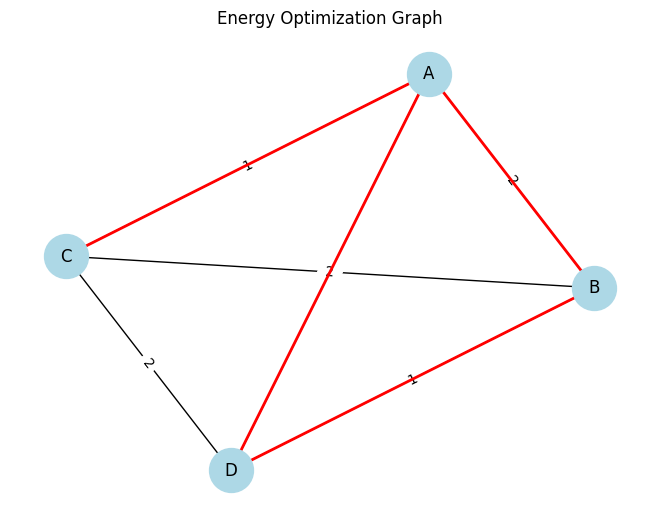

Shortest distances from node A:
A: 0
B: 2
C: 1
D: 1


In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def dijkstra(graph, start):
    distance = {node: float('inf') for node in graph}
    distance[start] = 0
    queue = [(0, start)]
    while queue:
        curr_dist, node = heapq.heappop(queue)
        for neighbor, weight in graph[node].items():
            dist = curr_dist + weight
            if dist < distance[neighbor]:
                distance[neighbor] = dist
                heapq.heappush(queue, (dist, neighbor))
    return distance

def draw_graph(graph, shortest_paths=None):
    G = nx.Graph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if shortest_paths:
        path_edges = []
        for node in shortest_paths:
            for neighbor, weight in graph[node].items():
                if shortest_paths[node] + weight == shortest_paths.get(neighbor, float('inf')):
                    path_edges.append((node, neighbor))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Energy Optimization Graph")
    plt.show()

if __name__ == "__main__":
    graph = {
        'A': {'B': 2, 'C': 1, 'D': 1},
        'B': {'A': 2, 'C': 2, 'D': 1},
        'C': {'A': 1, 'B': 2, 'D': 2},
        'D': {'A': 1, 'B': 1, 'C': 2}
    }
    start_node = 'A'
    shortest_distances = dijkstra(graph, start_node)
    draw_graph(graph, shortest_distances)
    print(f"Shortest distances from node {start_node}:")
    for node, dist in shortest_distances.items():
        print(f"{node}: {dist}")
